In this notebook we read in the raw data from SpaceRanger and do quality control and some basic analyses.

In [1]:
import os
import sys

import anndata as ad
import scanpy as sc

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

import plotnine
from plotnine import *

sys.path.insert(0, "..")
from plot_settings import *
from utils import *

The data come from multiple experiments and sequencing runs. We use Scanpy to read the SpaceRanger output into AnnData objects and store these in a dict.

In [2]:
samples = {}
for s in range(1,4):
    sname = f"1.{s}"
    sample = sc.read_visium(f"../../spaceranger_output/2022-02/2022-02_Sample1-{s}/outs/", library_id=sname)
    sample.var_names_make_unique()
    samples[sname] = sample

for s in range(1,5):
    sname = f"2.{s}"
    sample = sc.read_visium(f"../../spaceranger_output/2022-02/2022-02_Sample2-{s}/outs/", library_id=sname)
    sample.var_names_make_unique()
    samples[sname] = sample
    
for s in (1, 4):
    sname = f"3.{s}"
    sample = sc.read_visium(f"../../spaceranger_output/2022-06/2022-06_Sample3-{s}/outs/", library_id=sname)
    sample.var_names_make_unique()
    samples[sname] = sample

for s in range(1, 4):
    sname = f"4.{s}"
    sample = sc.read_visium(f"../../spaceranger_output/2022-06/2022-06_Sample4-{s}/outs/", library_id=sname)
    sample.var_names_make_unique()
    samples[sname] = sample
    
for s in range(2, 5):
    sname = f"5.{s}"
    sample = sc.read_visium(f"../../spaceranger_output/2022-06/2022-06_Sample5-{s}/outs/", library_id=sname)
    sample.var_names_make_unique()
    samples[sname] = sample

/home/kats/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/home/kats/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/home/kats/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/home/kats/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/home/kats/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/home/kats/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make 

We now claculate some basic QC metrics using Scanpy's built-in functionality and display these metrics for each sample.

In [3]:
for sample in samples.values():
    sc.pp.calculate_qc_metrics(sample, inplace=True)

In [4]:
make_qc_df(samples)

sample  spots  median total counts  mean total counts  stddev total counts  \
0     1.1   2487               3887.0        7538.735840          8458.541016   
1     1.2   3536               9737.5        9774.833008          6944.095215   
2     1.3   2566              28602.0       29835.011719         13256.642578   
3     2.1    948              17278.5       20612.216797         12566.262695   
4     2.2    568              37914.5       36444.230469         15385.851562   
5     2.3    447               1529.0        2340.308838          2711.980713   
6     2.4    861              20014.0       30624.144531         31396.277344   
7     3.1    610              18578.0       18918.320312         10334.012695   
8     3.4   3991              22625.0       22587.388672          8816.371094   
9     4.1   3224              10335.5       10947.142578          4876.740723   
10    4.2   3613                770.0        3883.893799          8432.311523   
11    4.3   2786              25071.0       24576.214844          5918.290527   
12    5.2   2420              23177.5       22959.078125         10761.278320   
13    5.3   2467               9003.0       10204.212891          7127.316895   
14    5.4   2813              22506.0       23229.458984         11049.251953   

    median detected genes  mean detected genes  stddev detected genes  
0                  2560.0          3037.416164            2677.240964  
1                  4550.0          4021.914310            2021.010909  
2                  7550.5          7279.892440            1478.146929  
3                  6086.5          6064.316456            1727.254254  
4                  8368.0          7869.992958            1669.159307  
5                  1167.0          1445.662192            1122.987767  
6                  6816.0          6048.744483            3491.618359  
7                  6561.5          6111.906557            1967.904134  
8                  6920.0          6673.385117            1262.503178  
9                  4905.5          4846.615385            1306.513236  
10                  680.0          1611.463880            2088.570366  
11                 7520.5          7350.451543             922.682721  
12                 7248.5          6757.029339            1785.902452  
13                 4483.0          4338.969599            1939.537993  
14                 7463.0          7142.067544            1801.946824

The standard workflow that we are following involves thresholding cells/spots by the number of detected reads and genes and thresholding genes by the number of cells/spots that they were detected in. To decide on the thresholds, we plot histograms of the relevant metrics.

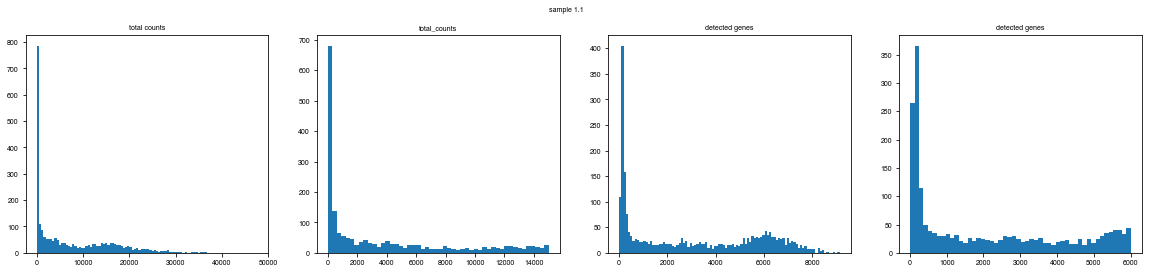

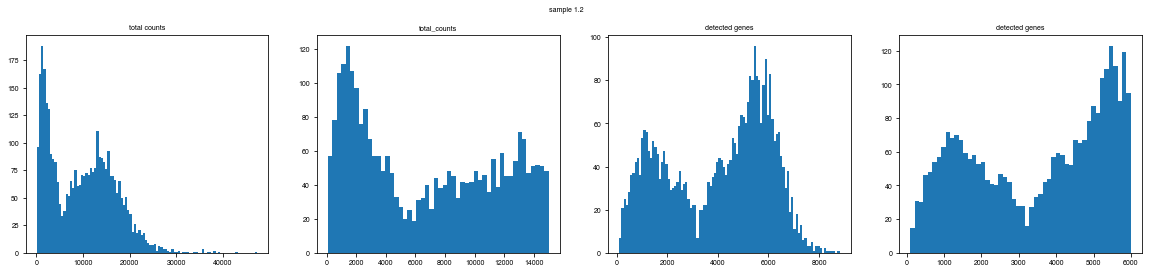

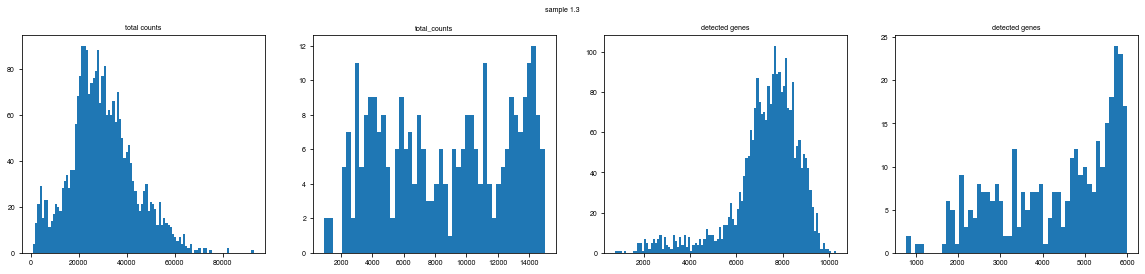

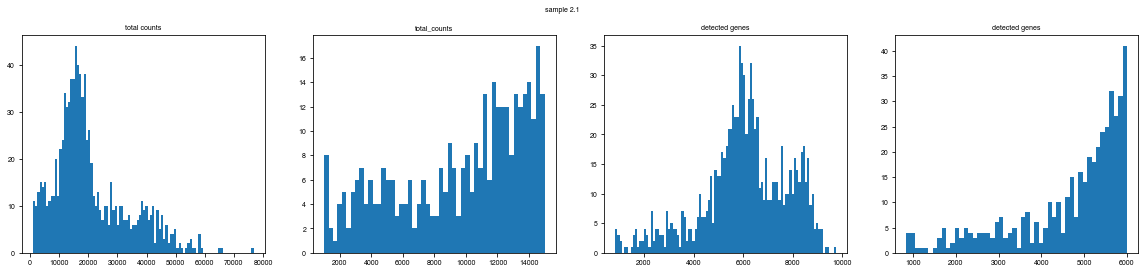

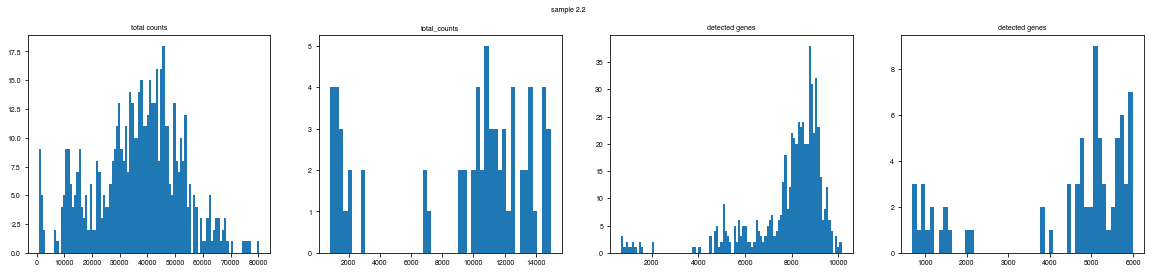

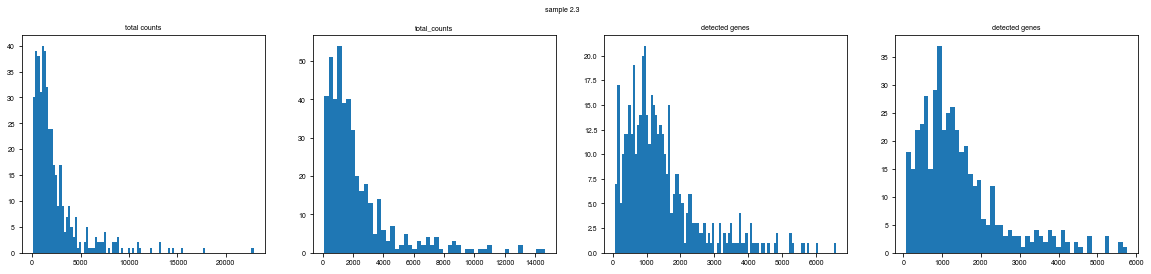

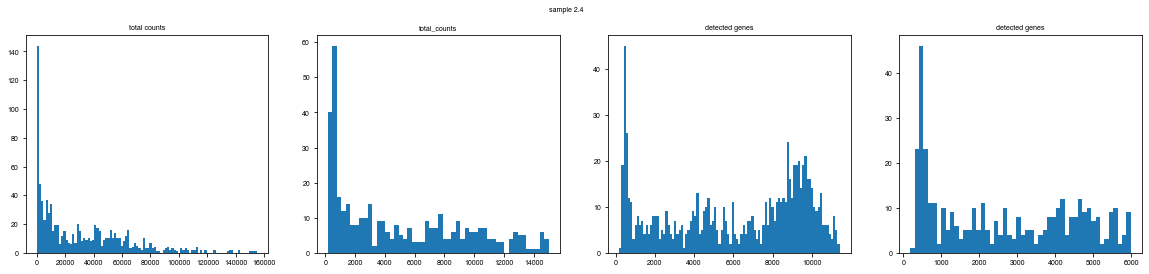

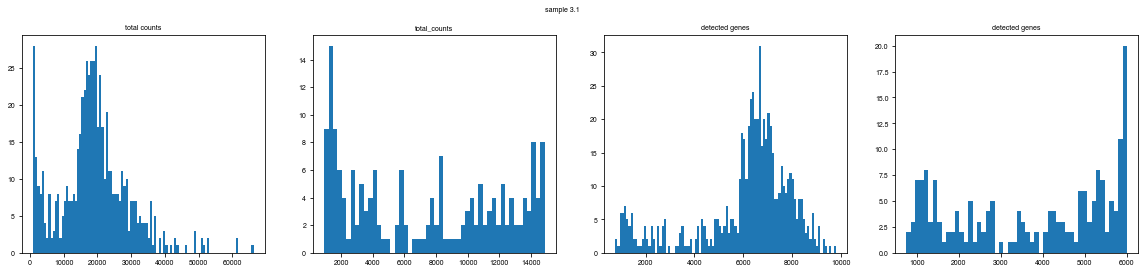

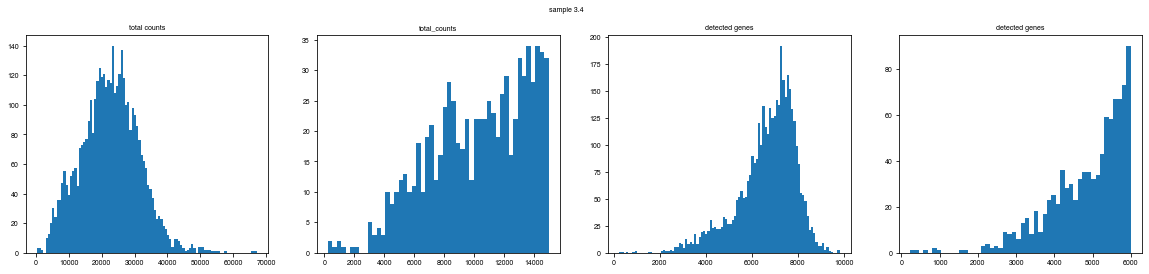

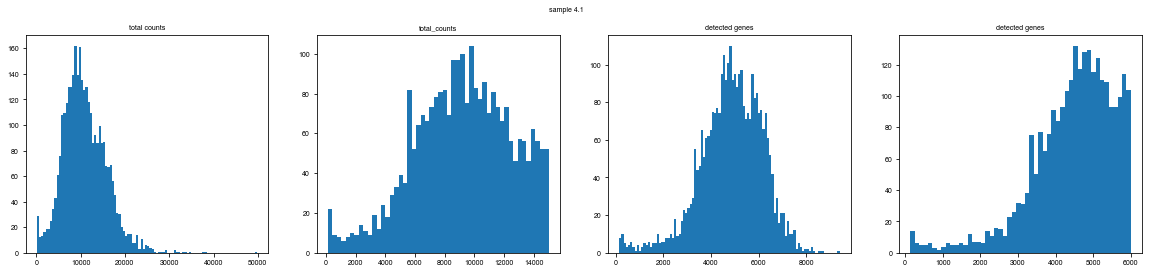

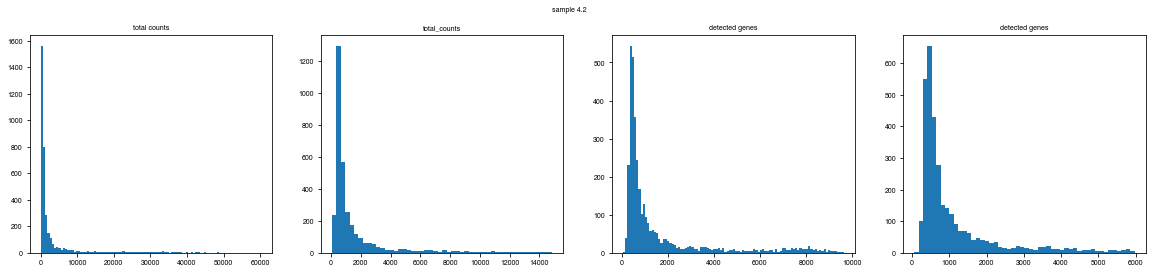

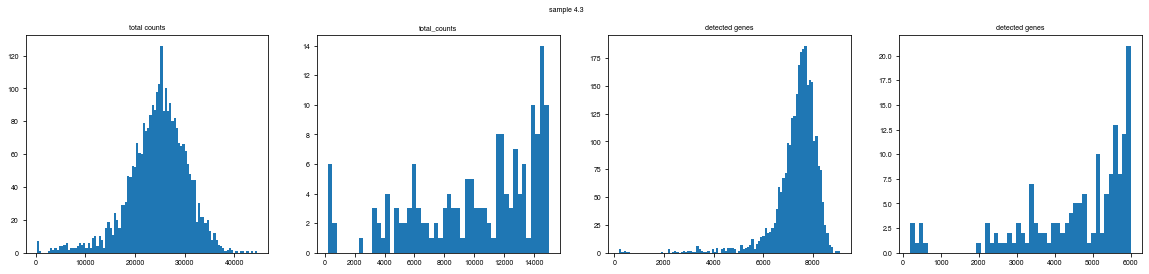

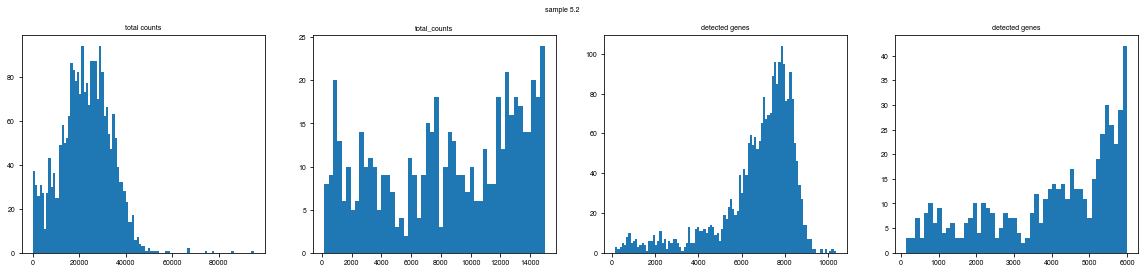

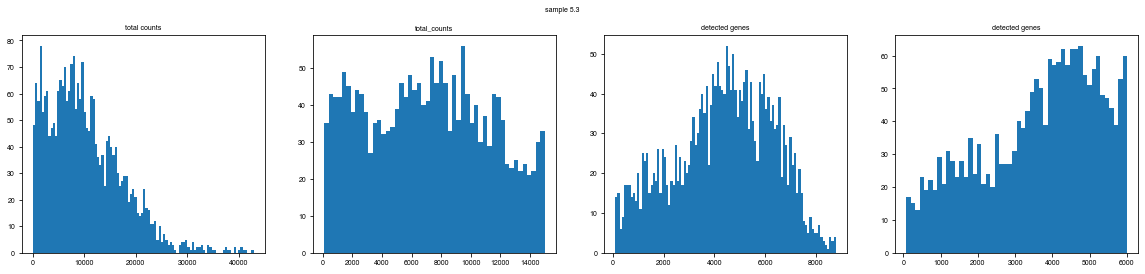

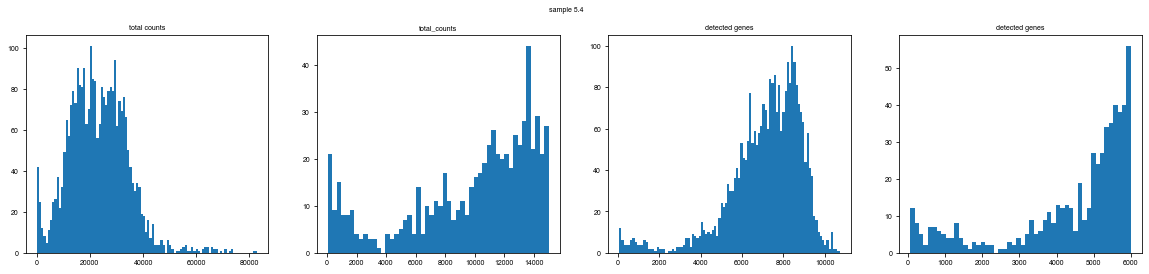

In [5]:
for i, sample in samples.items():
    fig, axs = plt.subplots(1, 4, figsize=(20, 4))
    axs[0].hist(sample.obs["total_counts"], bins=100)
    axs[0].set_title("total counts")
    axs[1].hist(sample.obs["total_counts"][sample.obs["total_counts"] < 15000], bins=50)
    axs[1].set_title("total_counts")
    axs[2].hist(sample.obs["n_genes_by_counts"], bins=100)
    axs[2].set_title("detected genes")
    axs[3].hist(sample.obs["n_genes_by_counts"][sample.obs["n_genes_by_counts"] < 6000], bins=50)
    axs[3].set_title("detected genes")
    
    fig.suptitle(f"sample {i}")

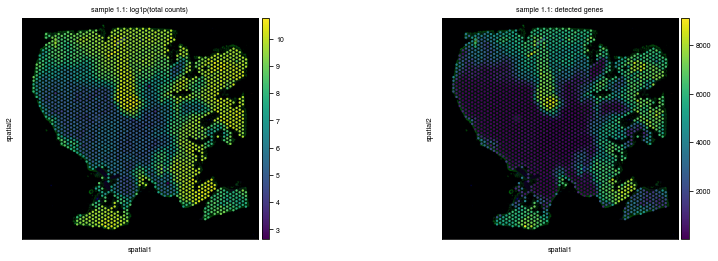

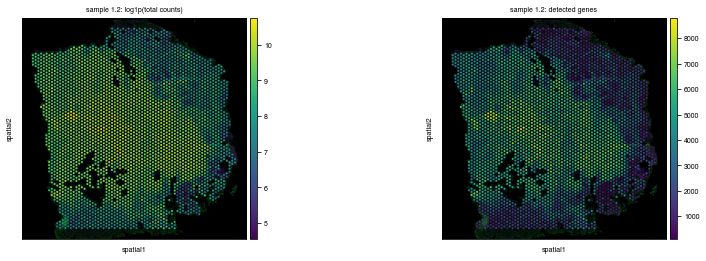

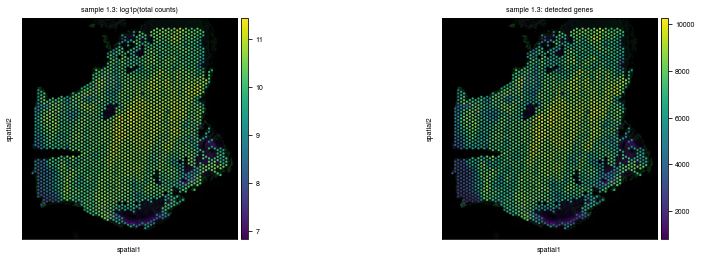

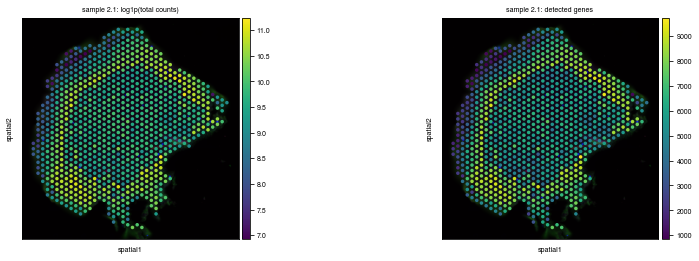

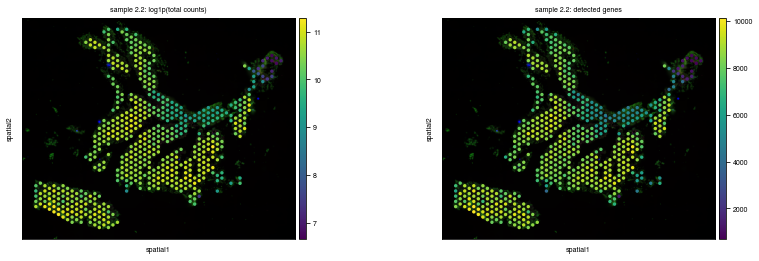

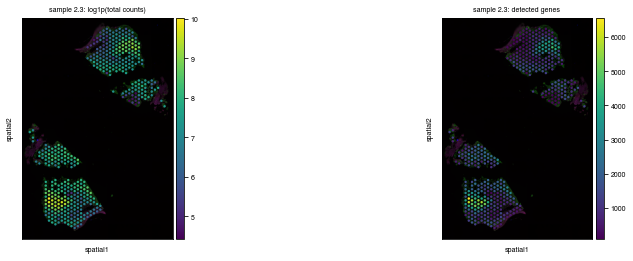

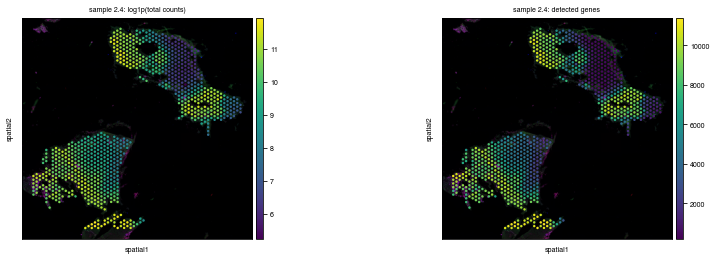

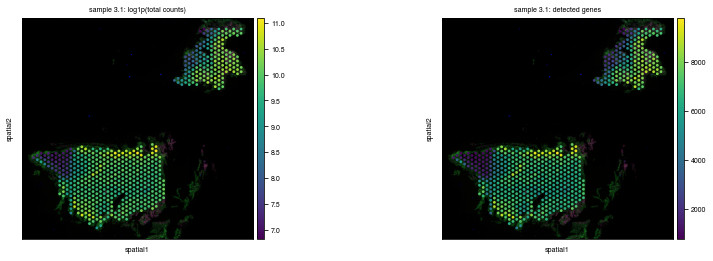

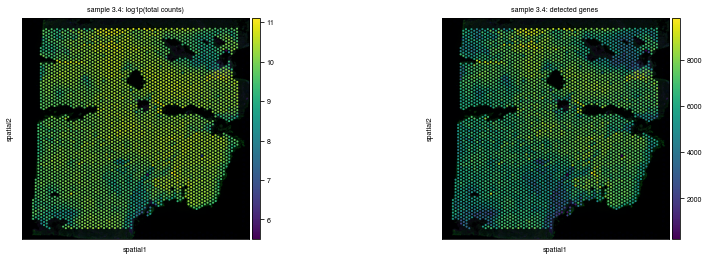

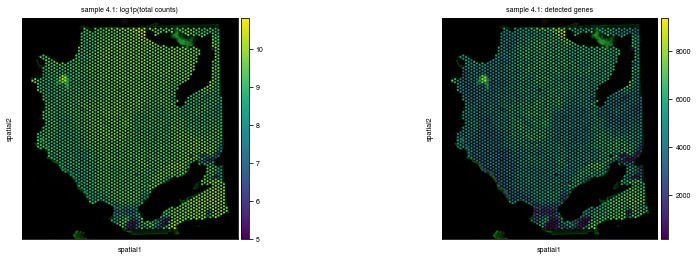

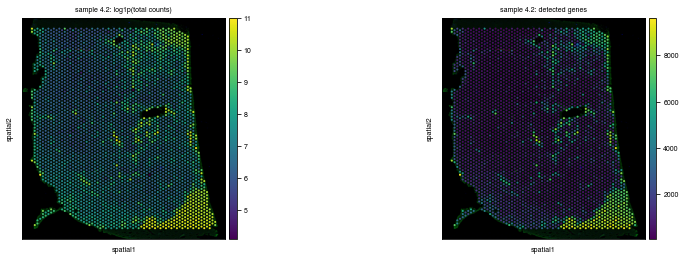

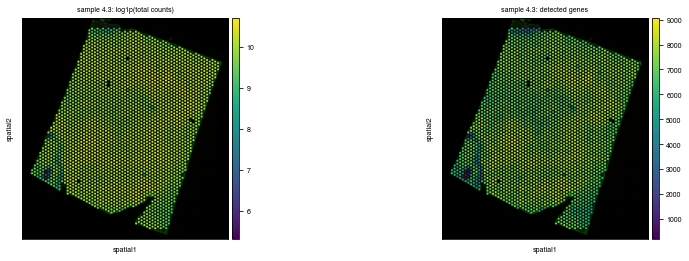

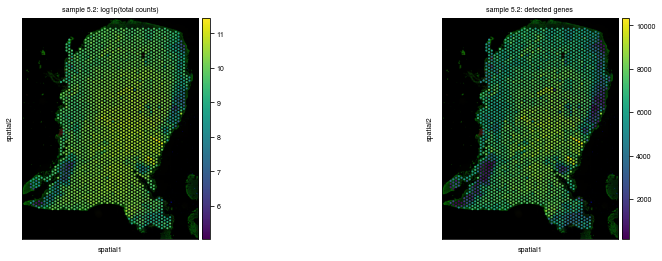

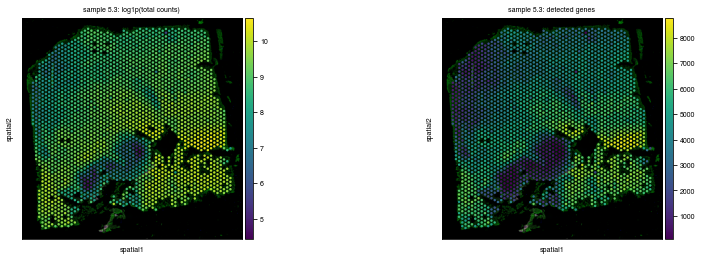

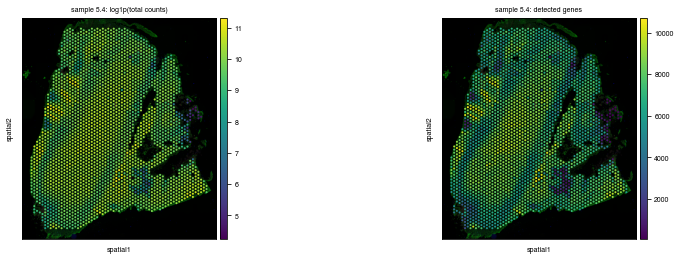

In [6]:
for i, sample in samples.items():
    sc.pl.spatial(sample, color=["log1p_total_counts", "n_genes_by_counts"], title=[f"sample {i}: log1p(total counts)", f"sample {i}: detected genes"])

Two samples are of very poor overall quality, so we remove them from further analysis.

In [7]:
del samples["2.3"]
del samples["4.2"]

We now apply filtering thresholds. Thresholds for filtering spots were determined by eyeballing the histograms above, while genes are filtered out if they were detected in less than 10% of all spots.

In [8]:
sc.pp.filter_cells(samples["1.1"], min_counts=1000)
sc.pp.filter_cells(samples["1.2"], min_counts=3000)
sc.pp.filter_cells(samples["1.3"], min_counts=6000)
sc.pp.filter_cells(samples["2.1"], min_counts=5000)
sc.pp.filter_cells(samples["2.2"], min_counts=15000)
sc.pp.filter_cells(samples["2.4"], min_counts=5000)
sc.pp.filter_cells(samples["3.1"], min_counts=5000)
sc.pp.filter_cells(samples["3.4"], min_counts=3000)
sc.pp.filter_cells(samples["4.1"], min_counts=5000)
sc.pp.filter_cells(samples["4.3"], min_counts=15000)
sc.pp.filter_cells(samples["5.2"], min_counts=6000)
sc.pp.filter_cells(samples["5.3"], min_counts=2000)
sc.pp.filter_cells(samples["5.4"], min_counts=4000)

for sample in samples.values():
    sc.pp.filter_genes(sample, min_cells=0.1 * sample.shape[0])

In [9]:
make_qc_df(samples)

sample  spots  median total counts  mean total counts  stddev total counts  \
0     1.1   1590              11199.5       11644.597656          8071.065430   
1     1.2   2642              12633.0       12555.930664          5808.997070   
2     1.3   2469              29216.0       30853.152344         12456.135742   
3     2.1    881              17973.0       21940.789062         12034.273438   
4     2.2    500              40204.5       40135.511719         12327.407227   
5     2.4    631              36607.0       41175.265625         30455.050781   
6     3.1    537              19414.0       21175.880859          8860.325195   
7     3.4   3983              22636.0       22630.568359          8772.309570   
8     4.1   2966              10812.0       11628.222656          4455.604492   
9     4.3   2621              25349.0       25487.892578          4705.764648   
10    5.2   2251              24250.0       24480.125000          9548.000000   
11    5.3   2198               9856.5       11321.858398          6747.008301   
12    5.4   2723              23138.0       23956.544922         10467.166016   

    median detected genes  mean detected genes  stddev detected genes  
0                  5087.5          4615.057233            2071.591247  
1                  5227.0          4979.153671            1324.570707  
2                  7595.0          7466.606318            1155.429303  
3                  6221.0          6362.994325            1383.772388  
4                  8504.5          8367.102000             829.148192  
5                  8488.0          7794.646593            2223.077424  
6                  6693.0          6710.163873            1160.968959  
7                  6920.0          6684.981421            1236.759971  
8                  5032.5          5087.863115            1028.658797  
9                  7564.0          7519.826784             536.089268  
10                 7366.0          7125.865393            1190.503630  
11                 4734.0          4761.192448            1601.932079  
12                 7520.0          7346.160852            1427.209850

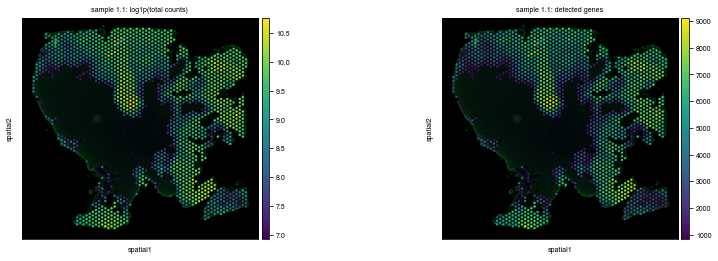

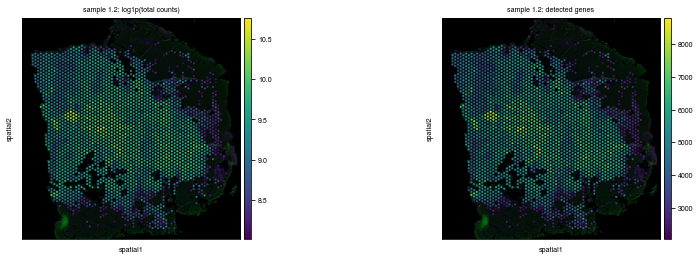

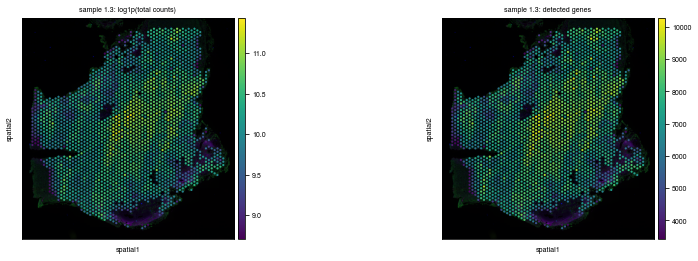

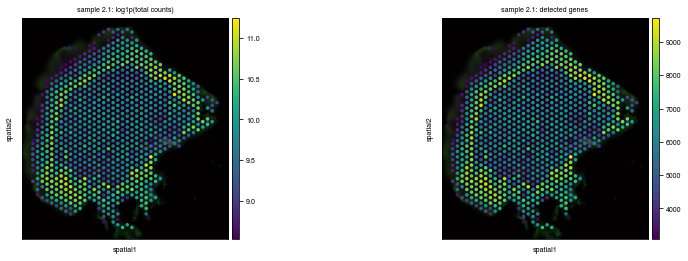

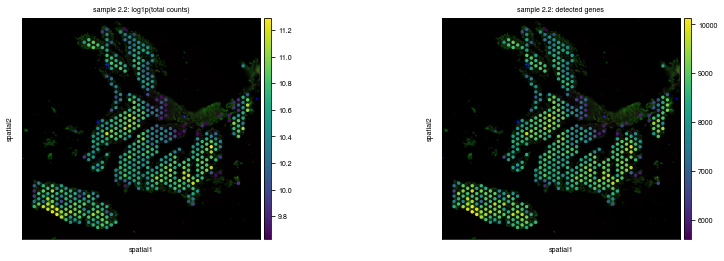

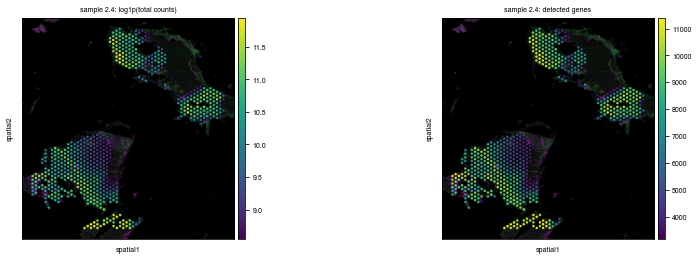

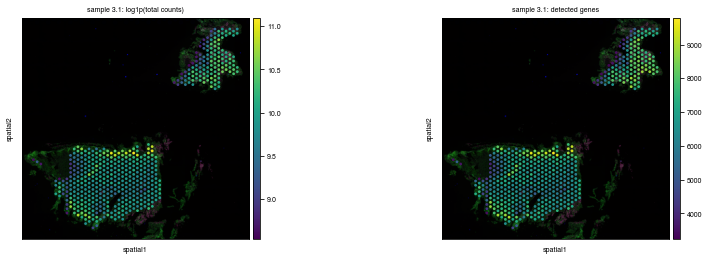

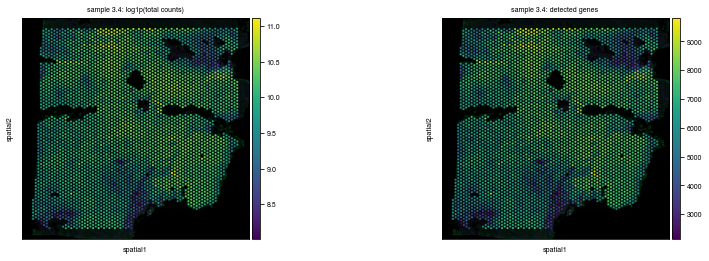

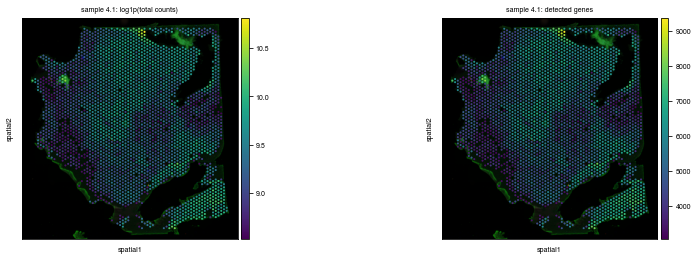

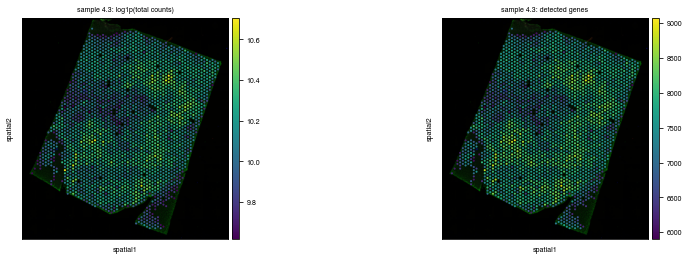

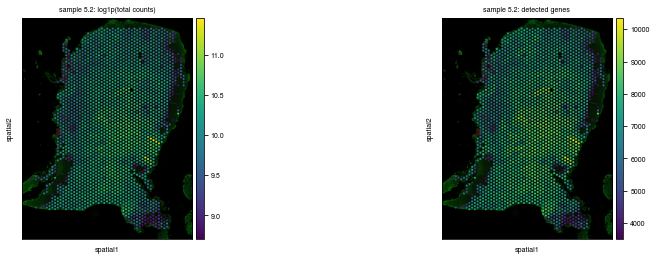

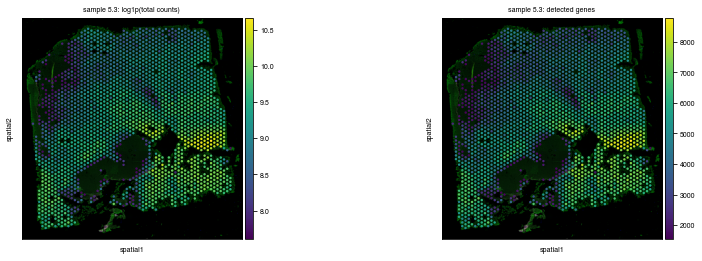

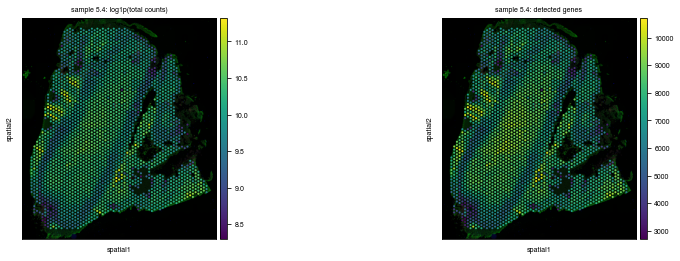

In [10]:
for i, sample in samples.items():
    sc.pl.spatial(sample, color=["log1p_total_counts", "n_genes_by_counts"], title=[f"sample {i}: log1p(total counts)", f"sample {i}: detected genes"])

We now normalize the count data by the total sequencing depth and log-transform it to have something that is approximately normally distributed for further analyses. The raw counts are stored in a separate layer of the AnnData.

In [11]:
for sample in samples.values():
    sample.layers["counts"] = sample.X.copy()
    sc.pp.normalize_total(sample, target_sum=1e4, key_added="scaling_factor")
    sc.pp.log1p(sample)

We can now plot normalized expression for a few selected genes.

In [12]:
def plot_gene(gene, smpls, titles=None, **kwargs):
    fix, ax = plt.subplots(1, len(smpls))
    vmax = np.max([np.max(samples[k][:, gene].X) for k in smpls])
    for i, sample in enumerate(smpls):
        title = None if titles is None else titles[i]
        cbarloc = "right" if i == len(smpls) - 1 else None
        sc.pl.spatial(
            samples[sample],
            color=gene,
            vmin=0,
            vmax=vmax,
            ax=ax[i],
            img_key=None,
            colorbar_loc=cbarloc,
            title=title,
            show=False,
            **kwargs
        )

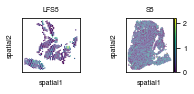

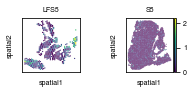

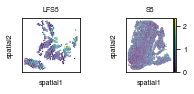

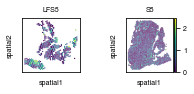

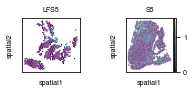

In [13]:
with mpl.rc_context({"figure.figsize": (3, 1)}):
    for gene in ("VEGFA", "IL32", "PDGFRB", "VWF", "WNT4"):
        plot_gene(gene, ("2.2", "5.4"), (human_sample_map["2.2"], human_sample_map["5.4"]), size=1.5)
        plt.savefig(f"figures/3A_{gene}.svgz")
        plt.show()

/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 1 x 1 in image.
/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: figures/3A_VEGFA_violin.svgz
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/

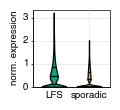

/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 1 x 1 in image.
/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: figures/3A_IL32_violin.svgz
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/l

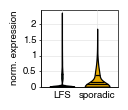

/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 1 x 1 in image.
/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: figures/3A_PDGFRB_violin.svgz
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local

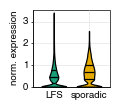

/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 1 x 1 in image.
/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: figures/3A_VWF_violin.svgz
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/li

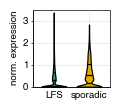

/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 1 x 1 in image.
/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: figures/3A_WNT4_violin.svgz


/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[

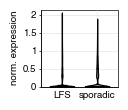

In [14]:
for gene in ("VEGFA", "IL32", "PDGFRB", "VWF", "WNT4"):
    p = plot_gene_violin(samples, gene) + theme(figure_size=(1, 1))
    p.save(f"figures/3A_{gene}_violin.svgz")
    print(p)

/tmp/ipykernel_91501/2214102362.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 3 x 1.95 in image.
/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: figures/S8_violin.svgz
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-bas

/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[

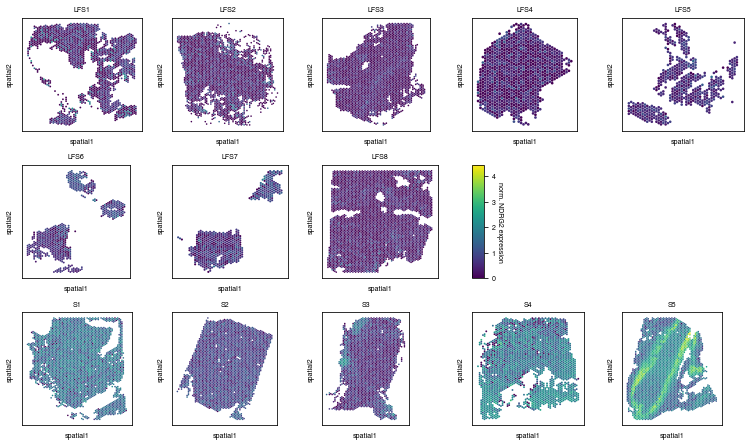

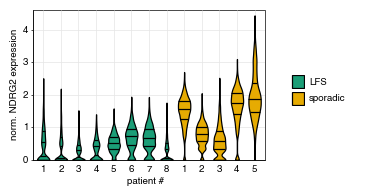

/tmp/ipykernel_91501/2214102362.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 3 x 1.95 in image.
/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: figures/S9_violin.svgz
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-bas

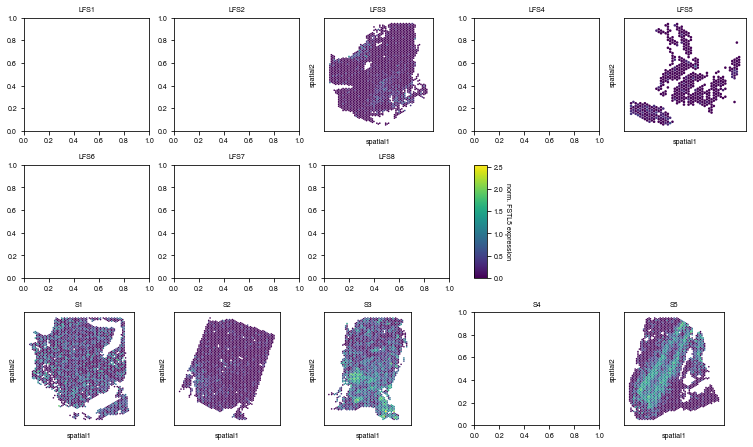

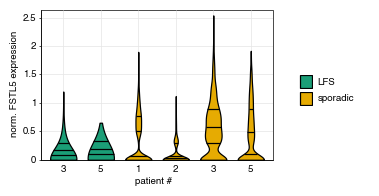

/tmp/ipykernel_91501/2214102362.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 3 x 1.95 in image.
/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: figures/S10_violin.svgz
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-ba

/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[

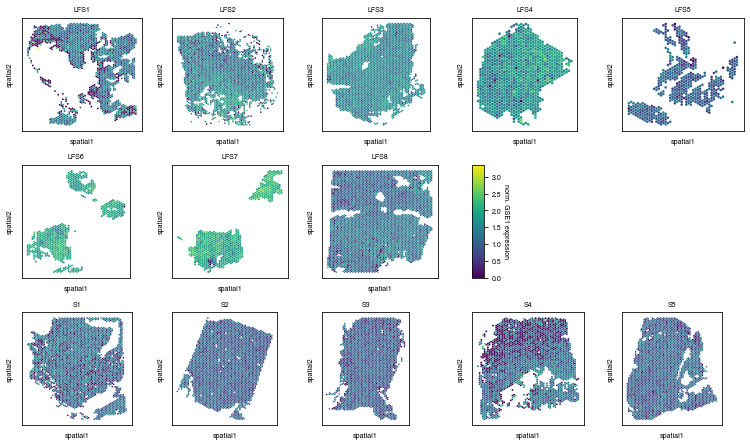

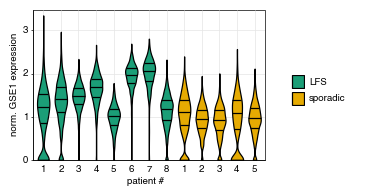

/tmp/ipykernel_91501/2214102362.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 3 x 1.95 in image.
/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: figures/S11_violin.svgz
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-ba

/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[

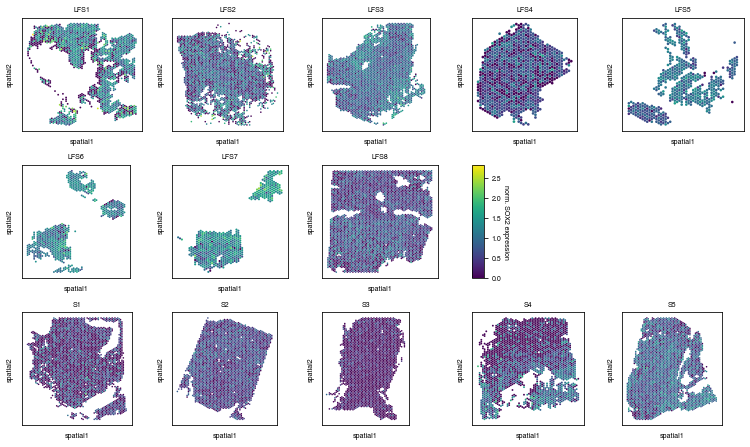

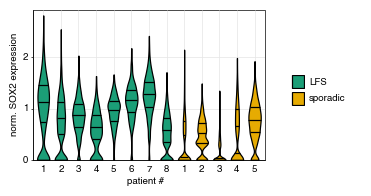

/tmp/ipykernel_91501/2214102362.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 3 x 1.95 in image.
/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: figures/S12_violin.svgz
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-ba

/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[

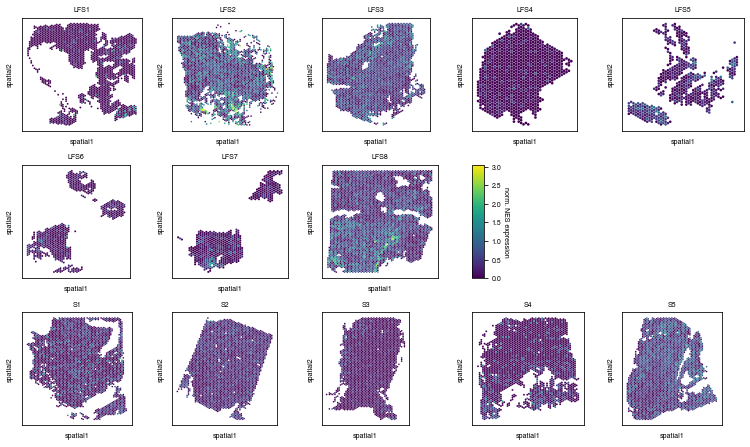

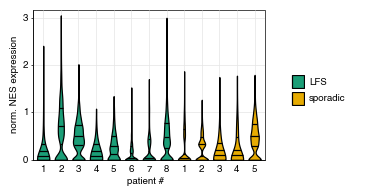

In [54]:
for gi, gene in enumerate(("NDRG2", "FSTL5", "GSE1", "SOX2", "NES")):    
    fig, axs = plt.subplots(3, 5)
    fig.set_size_inches(13, 7.5)
    fig.delaxes(axs[1, 4])

    vmax = np.max([np.max(sample[:, gene].X) for sample in samples.values() if gene in sample.var_names])
    
    cbaridx = (0, 0)
    for i, sname in enumerate(sorted(samples.keys())):
        row = 0 if i < 5 else 1 if i < 8 else 2
        col = (i - row * 5) % 5 if i < 8 else (i - 8) % 5

        if gene in samples[sname].var_names:
            sc.pl.spatial(
                samples[sname],
                title=human_sample_map[sname],
                color=gene,
                img_key=None,
                size=1.5,
                ax=axs[row, col],
                show=False,
                colorbar_loc=None,
                vmin=0,
                vmax=vmax,
            )
            cbaridx = (row, col)
        else:
            axs[row, col].set_title(human_sample_map[sname])
        axs[row, col].set_anchor("NW")

    cbar = fig.colorbar(axs[cbaridx].collections[0], axs[1, 3])
    cbar.set_label(f"norm. {gene} expression", rotation=-90, labelpad=8)

    fig.subplots_adjust(hspace=0.3)
    box = axs[1, 3].get_position()
    axs[1, 3].set_position([box.x0, box.y0, box.width * 0.1, box.height])

    fig.savefig(f"figures/S{gi + 8}.svgz")
    fig.show()

    p = (
        plot_gene_violin(samples, gene, plot_samples=True)
        + theme(
            aspect_ratio="auto",
            figure_size=(3, 1.95),
            axis_ticks_major_x=element_blank(),
        )
        + labs(y=f"norm. {gene} expression")
    )
    p.save(f"figures/S{gi + 8}_violin.svgz")
    print(p)

/home/kats/.local/lib/python3.10/site-packages/plotnine/scales/scales.py:36: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 1.95 in image.
/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: figures/8C_violin.svgz
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be tre

/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:694: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
/home/kats/.local/lib/python3.10/site-packages/plotnine/utils.py:693: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[

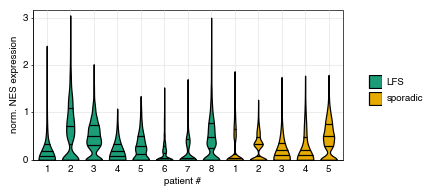

In [16]:
p = (
    plot_gene_violin(samples, "NES", plot_samples=True)
    + scale_x_discrete(labels=lambda x: [k[-1] for k in x.keys()])
    + theme(figure_size=(4, 1.95))
    + labs(y="norm. NES expression")
)
p.save(f"figures/8C_violin.svgz")
print(p)

Here we perform Leiden clustering and plot the clusters in space as well as UMAPs. For the clustering, we use the standard workflow of PCA -> k-nearest neighbors -> Leiden.

/home/kats/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/home/kats/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/home/kats/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/home/kats/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/home/kats/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/home/kats/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: User

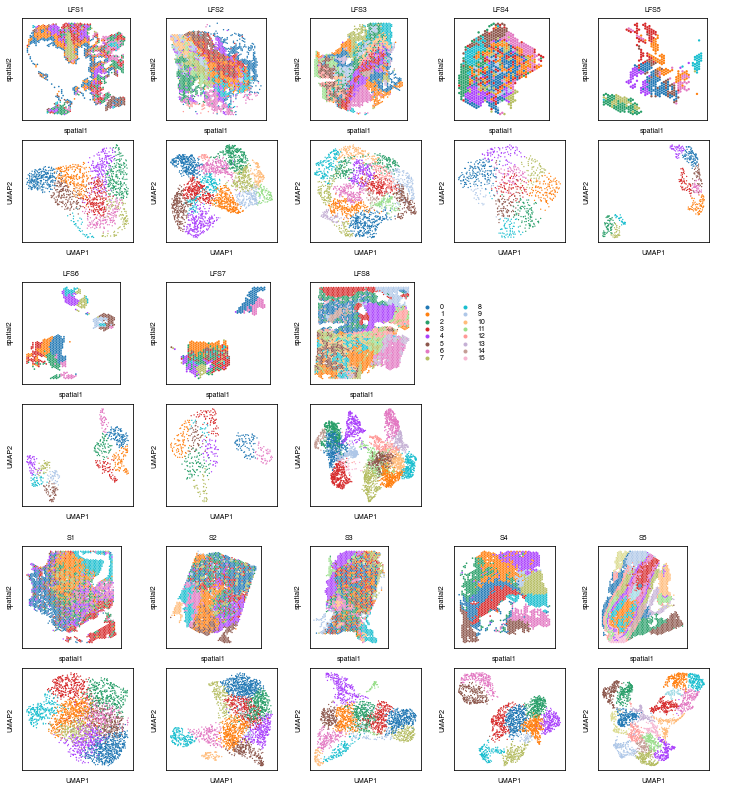

In [17]:
with mpl.rc_context({"legend.labelspacing": 0.05, "legend.markerscale": 0.5}):
    fig = plt.gcf()
    figs = fig.subfigures(3, 5)
    fig.set_size_inches(10, 11)
    for i, sname in enumerate(sorted(samples.keys())):
        row = 0 if i < 5 else 1 if i < 8 else 2
        col = (i - row * 5) % 5 if i < 8 else (i - 8) % 5
        
        legend_loc = "right margin" if row == 1 and col == 2 else None

        sample = samples[sname]
        sc.pp.highly_variable_genes(
            sample, layer="counts", flavor="seurat_v3", n_top_genes=2000
        )
        sc.pp.pca(sample, n_comps=100)
        # sc.pl.pca_variance_ratio(sample, n_pcs=100, log=True, show=False)
        # plt.gcf().suptitle(sname)
        # plt.show()

        sc.pp.neighbors(sample, n_neighbors=15, n_pcs=20)
        sc.tl.umap(sample)
        sc.tl.leiden(sample, resolution=1)

        axs = figs[row, col].subplots(2, 1)

        sc.pl.umap(
            sample,
            title="",
            color="leiden",
            size=7,
            ax=axs[1],
            show=False,
            legend_loc=None,
            palette=sc.pl.palettes.default_20
        )
        sc.pl.spatial(
            sample,
            title=human_sample_map[sname],
            color="leiden",
            img_key=None,
            size=1.5,
            ax=axs[0],
            show=False,
            legend_loc=legend_loc,
            palette=sc.pl.palettes.default_20
        )
        axs[0].set_anchor("NW")
        figs[row, col].subplots_adjust(top=1, bottom=0.15, wspace=0)
    fig.savefig("figures/S4.svgz")
    fig.show()

We can now attempt to quantify transcriptional heterogeneity in LFS and sporadic medulloblastoma by looking at how many clusters were detected on average in each tumor type. Since we used the same clustering settings for all samples, this should be somewhat informative.

In [18]:
df = []
for sample, adata in samples.items():
    regions, counts = np.unique(adata.obs.leiden, return_counts=True)
    df.append(
        pd.DataFrame(
            {
                "sample": [human_sample_map[sample]],
                "nregions": (counts > 4).sum(),
                "nspots": adata.n_obs,
                "type": "LFS" if int(sample[0]) <= 3 else "sporadic"
            }
        )
    )
df = pd.concat(df).sort_values("sample").reset_index(drop=True)
df

sample  nregions  nspots      type
0    LFS1         9    1590       LFS
1    LFS2        13    2642       LFS
2    LFS3        15    2469       LFS
3    LFS4        10     881       LFS
4    LFS5         9     500       LFS
5    LFS6        10     631       LFS
6    LFS7         9     537       LFS
7    LFS8        16    3983       LFS
8      S1         9    2966  sporadic
9      S2        11    2621  sporadic
10     S3        12    2251  sporadic
11     S4        10    2198  sporadic
12     S5        18    2723  sporadic

/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 0.9 x 1.95 in image.
/home/kats/.local/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: figures/S5.svgz


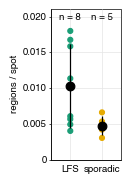

In [19]:
p = (
    ggplot(df, aes("type", "nregions/nspots", color="type"))
    + geom_point()
    + stat_summary(geom="pointrange", fun_data="mean_sdl", fun_args={"mult": 1}, color="black", fatten=6)
    + scale_y_continuous(limits=(0, None), expand=(0, 0, 0.05, 0))
    + labs(x=None, y="regions / spot")
    + guides(color=None)
    + lfs_sporadic_color_scale
    + theme(aspect_ratio="auto", axis_ticks_major_x=element_blank(), figure_size=(0.9, 1.95))
    + annotate("text", x=1, y=0.02, label="n = 8", size=7)
    + annotate("text", x=2, y=0.02, label="n = 5", size=7)
)
p.save("figures/S5.svgz")
print(p)

In [20]:
from scipy.stats import mannwhitneyu

mannwhitneyu(
    (df.nregions / df.nspots)[df.type == "LFS"],
    (df.nregions / df.nspots)[df.type != "LFS"],
    alternative="greater",
)

MannwhitneyuResult(statistic=32.0, pvalue=0.046620046620046623)

We write the AnnData objects to disk for further analysis and processing.

In [21]:
os.makedirs("adatas", exist_ok=True)
for sname, adata in samples.items():
    adata.write_h5ad(os.path.join("adatas", sname + ".h5ad"), compression="gzip", compression_opts=9)